In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [63]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['DATE', 'HARE', 'LYNX'])
print(df)

    DATE   HARE   LYNX
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['HARE', 'LYNX']])
print(scaled_data)

[[0.11786543 0.35320378]
 [0.11799801 0.55094538]
 [0.1180643  0.60346639]
 [0.06755055 0.47702206]
 [0.17394763 0.23686975]
 [0.37255552 0.06867122]
 [0.48259861 0.0311187 ]
 [0.48584687 0.02481618]
 [0.57461054 0.09164916]
 [0.39429897 0.21546744]
 [0.48306265 0.39023109]
 [0.57182632 0.40953256]
 [0.44222738 0.34663866]
 [0.2014584  0.23778887]
 [0.07185946 0.13786765]
 [0.13052701 0.05856092]
 [0.18926086 0.01168592]
 [0.00251906 0.01181723]
 [1.         0.14627101]
 [0.97156115 0.45995273]
 [0.55691084 0.75617122]
 [0.26257872 0.88734244]
 [0.08584687 0.91360294]
 [0.00318197 0.51851366]
 [0.02724561 0.17331933]
 [0.05402718 0.08718487]
 [0.05727544 0.03426996]
 [0.45634736 0.02717962]
 [0.3203182  0.20640756]
 [0.32038449 0.3644958 ]
 [0.65926417 0.36751576]
 [0.63188598 0.56657038]
 [0.56155121 0.55908613]
 [0.46648989 0.53781513]
 [0.2420948  0.43513655]
 [0.05508784 0.11607143]
 [0.03937686 0.12355567]
 [0.05217103 0.19892332]
 [0.27391448 0.41951155]
 [0.33417302 0.53282563]


In [65]:
xs, ys = [], []
seq_length=3
for i in range(len(scaled_data)-seq_length):
    x = scaled_data[i:(i + seq_length)]
    xs.append(x)

    y = scaled_data[i + seq_length]
    ys.append(y)

X, y = np.array(xs), np.array(ys)
print(X)
print(y)

[[[0.11786543 0.35320378]
  [0.11799801 0.55094538]
  [0.1180643  0.60346639]]

 [[0.11799801 0.55094538]
  [0.1180643  0.60346639]
  [0.06755055 0.47702206]]

 [[0.1180643  0.60346639]
  [0.06755055 0.47702206]
  [0.17394763 0.23686975]]

 [[0.06755055 0.47702206]
  [0.17394763 0.23686975]
  [0.37255552 0.06867122]]

 [[0.17394763 0.23686975]
  [0.37255552 0.06867122]
  [0.48259861 0.0311187 ]]

 [[0.37255552 0.06867122]
  [0.48259861 0.0311187 ]
  [0.48584687 0.02481618]]

 [[0.48259861 0.0311187 ]
  [0.48584687 0.02481618]
  [0.57461054 0.09164916]]

 [[0.48584687 0.02481618]
  [0.57461054 0.09164916]
  [0.39429897 0.21546744]]

 [[0.57461054 0.09164916]
  [0.39429897 0.21546744]
  [0.48306265 0.39023109]]

 [[0.39429897 0.21546744]
  [0.48306265 0.39023109]
  [0.57182632 0.40953256]]

 [[0.48306265 0.39023109]
  [0.57182632 0.40953256]
  [0.44222738 0.34663866]]

 [[0.57182632 0.40953256]
  [0.44222738 0.34663866]
  [0.2014584  0.23778887]]

 [[0.44222738 0.34663866]
  [0.2014584  

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 2)),
    Dense(2)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200, Training MSE: 0.1432, Test MSE: 0.1056
Epoch 2/200, Training MSE: 0.1341, Test MSE: 0.0975
Epoch 3/200, Training MSE: 0.1248, Test MSE: 0.0899
Epoch 4/200, Training MSE: 0.1166, Test MSE: 0.0825
Epoch 5/200, Training MSE: 0.1081, Test MSE: 0.0757
Epoch 6/200, Training MSE: 0.1000, Test MSE: 0.0691
Epoch 7/200, Training MSE: 0.0927, Test MSE: 0.0630
Epoch 8/200, Training MSE: 0.0851, Test MSE: 0.0575
Epoch 9/200, Training MSE: 0.0787, Test MSE: 0.0524
Epoch 10/200, Training MSE: 0.0730, Test MSE: 0.0481
Epoch 11/200, Training MSE: 0.0674, Test MSE: 0.0449
Epoch 12/200, Training MSE: 0.0629, Test MSE: 0.0425
Epoch 13/200, Training MSE: 0.0595, Test MSE: 0.0411
Epoch 14/200, Training MSE: 0.0577, Test MSE: 0.0405
Epoch 15/200, Training MSE: 0.0566, Test MSE: 0.0402
Epoch 16/200, Training MSE: 0.0554, Test MSE: 0.0396
Epoch 17/200, Training MSE: 0.0548, Test MSE: 0.0388
Epoch 18/200, Training MSE: 0.0541, Test MSE: 0.0378
Epoch 19/200, Training MSE: 0.0534, Test MSE: 0.0371
Ep

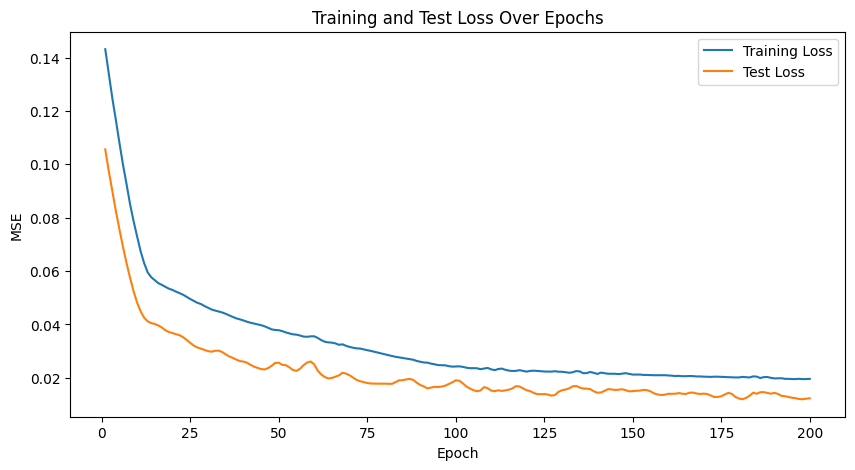

Final Test MSE: 0.012291553430259228


In [68]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32, verbose=0)
    
    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [69]:
df = pd.read_csv('../../Datasets/study_373/top_5_373.csv', usecols=['DATE', '46670', '46982', '46504', '46571', '46888'])
print(df)

           DATE  46670  46982  46504  46571  46888
0    2008-06-08    1.0    2.0    1.0    1.0    2.0
1    2008-07-11    1.0    3.0    1.0    1.0    2.0
2    2008-09-14    2.0    6.0    2.0    1.0    1.0
3    2008-09-16    2.0    1.0    1.0    1.0    3.0
4    2008-09-22    2.0    4.0    1.0    1.0    2.0
..          ...    ...    ...    ...    ...    ...
388  2012-10-18   10.0    6.0    1.0    1.0    2.0
389  2012-10-22    8.0    6.0    1.0    1.0    3.0
390  2012-10-28    3.0    1.0    1.0    1.0    2.0
391  2012-11-08    2.0    7.0    1.0    1.0    2.0
392  2012-11-09    2.0    1.0    1.0    1.0    1.0

[393 rows x 6 columns]


In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['46670', '46982',  '46504',  '46571',  '46888']])
print(scaled_data)

[[0.         0.01694915 0.         0.         0.06666667]
 [0.         0.03389831 0.         0.         0.06666667]
 [0.02941176 0.08474576 0.07142857 0.         0.        ]
 ...
 [0.05882353 0.         0.         0.         0.06666667]
 [0.02941176 0.10169492 0.         0.         0.06666667]
 [0.02941176 0.         0.         0.         0.        ]]


In [71]:
xs, ys = [], []
seq_length=3
for i in range(len(scaled_data)-seq_length):
    x = scaled_data[i:(i + seq_length)]
    xs.append(x)

    y = scaled_data[i + seq_length][:5]
    ys.append(y)

X, y = np.array(xs), np.array(ys)
print(X.shape)
print(y.shape)

(390, 3, 5)
(390, 5)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 5)),
    Dense(5)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200, Training MSE: 0.0376, Test MSE: 0.0339
Epoch 2/200, Training MSE: 0.0287, Test MSE: 0.0268
Epoch 3/200, Training MSE: 0.0228, Test MSE: 0.0228
Epoch 4/200, Training MSE: 0.0202, Test MSE: 0.0218
Epoch 5/200, Training MSE: 0.0198, Test MSE: 0.0212
Epoch 6/200, Training MSE: 0.0194, Test MSE: 0.0209
Epoch 7/200, Training MSE: 0.0192, Test MSE: 0.0207
Epoch 8/200, Training MSE: 0.0189, Test MSE: 0.0204
Epoch 9/200, Training MSE: 0.0187, Test MSE: 0.0203
Epoch 10/200, Training MSE: 0.0185, Test MSE: 0.0200
Epoch 11/200, Training MSE: 0.0183, Test MSE: 0.0199
Epoch 12/200, Training MSE: 0.0182, Test MSE: 0.0197
Epoch 13/200, Training MSE: 0.0181, Test MSE: 0.0196
Epoch 14/200, Training MSE: 0.0180, Test MSE: 0.0193
Epoch 15/200, Training MSE: 0.0179, Test MSE: 0.0195
Epoch 16/200, Training MSE: 0.0178, Test MSE: 0.0193
Epoch 17/200, Training MSE: 0.0178, Test MSE: 0.0193
Epoch 18/200, Training MSE: 0.0177, Test MSE: 0.0192
Epoch 19/200, Training MSE: 0.0177, Test MSE: 0.0193
Ep

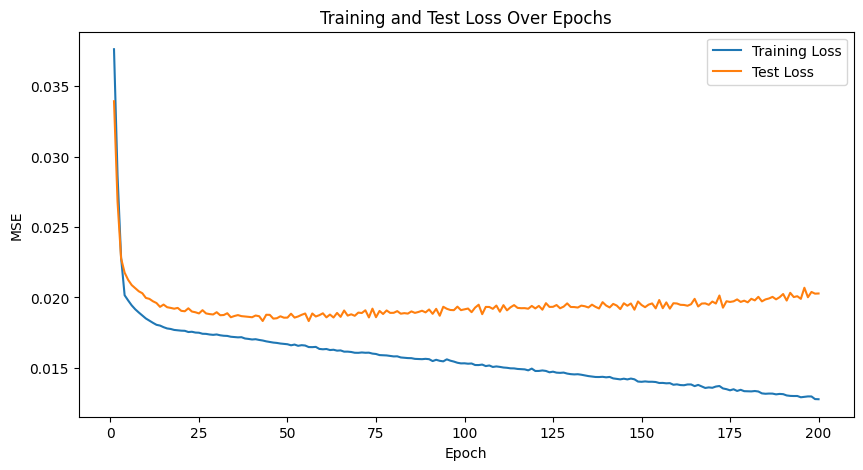

Final Test MSE: 0.02027854323387146


In [74]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32, verbose=0)
    
    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [75]:
df = pd.read_csv('../../Datasets/study_213/top_5_213.csv', usecols=['DATE', '7058', '8572', '39601', '8901', '7730'])
print(df)

            DATE    7058   8572  39601   8901   7730
0     1963-11-14  1531.0  422.0   19.0  164.0    2.0
1     1963-12-10   437.0   94.0   17.0   97.0    1.0
2     1964-10-25   189.0   66.0   36.0   23.0  761.0
3     1964-10-29   370.0  116.0   83.0  196.0  561.0
4     1964-12-04   101.0    5.0   21.0  233.0    2.0
...          ...     ...    ...    ...    ...    ...
1510  2008-10-28   255.0   16.0  185.0   44.0   15.0
1511  2008-10-30   741.0  735.0  252.0   87.0  382.0
1512  2008-11-03   287.0  291.0   14.0   16.0    1.0
1513  2008-11-04   732.0  468.0   32.0  186.0    1.0
1514  2008-11-08    78.0    3.0  471.0    1.0   14.0

[1515 rows x 6 columns]


In [76]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['7058', '8572',  '39601',  '8901',  '7730']])
print(scaled_data)

[[1.28012048e-01 2.95293540e-02 4.61491129e-04 4.23266684e-02
  1.61227912e-05]
 [3.64792503e-02 6.52311145e-03 4.10214337e-04 2.49285900e-02
  0.00000000e+00]
 [1.57295850e-02 4.55916392e-03 8.97343862e-04 5.71280187e-03
  1.22533213e-02]
 ...
 [2.39290495e-02 2.03408852e-02 3.33299149e-04 3.89509218e-03
  0.00000000e+00]
 [6.11613119e-02 3.27558392e-02 7.94790278e-04 4.80394703e-02
  0.00000000e+00]
 [6.44243641e-03 1.40281967e-04 1.20500461e-02 0.00000000e+00
  2.09596285e-04]]


In [77]:
xs, ys = [], []
seq_length=3
for i in range(len(scaled_data)-seq_length):
    x = scaled_data[i:(i + seq_length)]
    xs.append(x)

    y = scaled_data[i + seq_length]
    ys.append(y)

X, y = np.array(xs), np.array(ys)
print(X.shape)
print(y.shape)

(1512, 3, 5)
(1512, 5)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 5)),
    Dense(5)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200, Training MSE: 0.0070, Test MSE: 0.0072
Epoch 2/200, Training MSE: 0.0064, Test MSE: 0.0071
Epoch 3/200, Training MSE: 0.0063, Test MSE: 0.0071
Epoch 4/200, Training MSE: 0.0063, Test MSE: 0.0071
Epoch 5/200, Training MSE: 0.0062, Test MSE: 0.0070
Epoch 6/200, Training MSE: 0.0062, Test MSE: 0.0070
Epoch 7/200, Training MSE: 0.0062, Test MSE: 0.0070
Epoch 8/200, Training MSE: 0.0061, Test MSE: 0.0070
Epoch 9/200, Training MSE: 0.0061, Test MSE: 0.0071
Epoch 10/200, Training MSE: 0.0061, Test MSE: 0.0070
Epoch 11/200, Training MSE: 0.0061, Test MSE: 0.0070
Epoch 12/200, Training MSE: 0.0061, Test MSE: 0.0071
Epoch 13/200, Training MSE: 0.0061, Test MSE: 0.0070
Epoch 14/200, Training MSE: 0.0061, Test MSE: 0.0069
Epoch 15/200, Training MSE: 0.0060, Test MSE: 0.0069
Epoch 16/200, Training MSE: 0.0061, Test MSE: 0.0070
Epoch 17/200, Training MSE: 0.0060, Test MSE: 0.0070
Epoch 18/200, Training MSE: 0.0060, Test MSE: 0.0070
Epoch 19/200, Training MSE: 0.0060, Test MSE: 0.0069
Ep

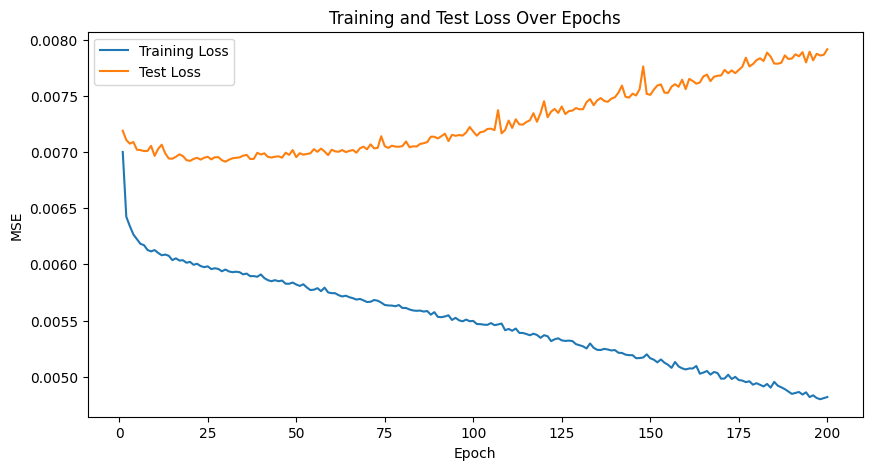

Final Test MSE: 0.0079164644703269


In [80]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32, verbose=0)
    
    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')